# Advanced Machine Learning Project
## Facial Expression Recognition (FER) Code

Dr. Moustafa Youssef    
Malak Gaballa - 900201683    
Masa Tantawy - 900201312


>[Advanced Machine Learning Project](#scrollTo=GZnC_DVnw4fu)

>>[Facial Expression Recognition (FER) Code](#scrollTo=GZnC_DVnw4fu)

>[Step 1 - Imports](#scrollTo=jztLCEnKxKQS)

>[Step 2 -  Data](#scrollTo=suS7WxYsxaxh)

>[Step 3 - Initial Run of Baseline Model](#scrollTo=2jN3li-qxWua)

>>[3.1 - Adjusting Data Shape](#scrollTo=o0Z1D1QOPMkz)

>>[3.2 - Model](#scrollTo=qDVG15urPXyr)

>>[3.3 - Evaluation Function](#scrollTo=4tbwbe6JS2b_)

>[Step 4 - Proposed Updates:](#scrollTo=6xPZlkJR4cuS)

>>[4.1 - Hyperparameters Tuning](#scrollTo=UmBK6JqvynHZ)

>>[4.2. - Data Imbalance Handling](#scrollTo=QQMVvd6Uxe_M)

>>>[Random Oversampling (ROS)](#scrollTo=QT3lYxOKLn8K)

>>>>[ROS Modelling](#scrollTo=7d8GysAO615U)

>>>[Synthetic Minority Over-sampling Technique (SMOTE)](#scrollTo=4Q67OHoALu0s)

>>>>[Modelling](#scrollTo=RgHmiUHu7UEo)

>>>[SmoteTomek](#scrollTo=qhrutcw8Lyga)

>>>>[Modelling](#scrollTo=EQ6PhAnP7Pn3)

>>>[Smoteen](#scrollTo=c34rzBqDLwEh)

>>[4.3 Data Augmentation](#scrollTo=gMFrNqA47MmW)

>>>[Image Flipping](#scrollTo=j1B2uH2D3VLx)

>>>[Image Rotation](#scrollTo=3MpHbACa34Bm)

>>>[Image Cropping](#scrollTo=JyqN6AOI36X4)

>>>[Noise Addition](#scrollTo=SzCvbSRY3-ov)

>>>[Custom Data Augmentation Function](#scrollTo=maUA8Qj48aXO)

>>>[Modelling](#scrollTo=IK9lc2Ep9a9E)

>>>>[ROS](#scrollTo=HU4h5uORlzLu)

>>>>[SMOTE](#scrollTo=x5jQyEwel1sy)

>>>>[SmoteTomek](#scrollTo=FWVAgE5Il6BG)

>>[4.4 Auxilary Datasets](#scrollTo=GfWaRTMhE0UB)

>>>[AffectNet Dataset](#scrollTo=6EvHTplhF9wK)

>>>>[Data Reading](#scrollTo=e7LNv1nOe7QQ)

>>>>[Dataframe creation](#scrollTo=sLyHgB0cfhel)

>>>[ExpW Dataset](#scrollTo=S_mGARk4KxX5)

>>>[Modelling](#scrollTo=wwxDtNr5-Ah1)

>>>>[ROS](#scrollTo=eEfNrMFPmALw)

>>>>[SMOTE](#scrollTo=K9FgYjS3mDU3)

>>>>[SmoteTomek](#scrollTo=8IctDOtfmGh3)

>>[Ensemble](#scrollTo=BZPwuXli8g-M)



<a id="chapter1"></a>
# Step 1 - Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="chapter2"></a>
# Step 2 -  Data

In [ ]:
# importing the FER dataset (main dataset)
FER = pd.read_csv("/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/fer2013.csv")
#FER = pd.read_csv("/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/fer2013.csv")
FER.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


0
0
2
4


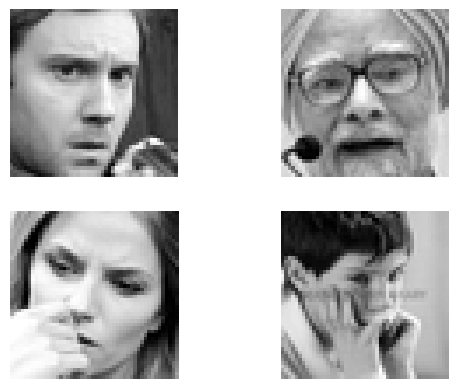

In [ ]:
# Splitting pixels
def string_to_array(s):
    return np.array(list(map(int, s.split())))

# Plot sample images
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = string_to_array(FER.pixels[i]).reshape(48, 48)
    print(FER.emotion[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
#FER.Usage.value_counts()
#FER.emotion.value_counts().sort_index()

<a id="chapter3"></a>
# Step 3 - Initial Run of Baseline Model

The baseline model implemented in our selected paper (PyTorch) can be found in this [notebook](https://colab.research.google.com/drive/1R1Ike42DSOZgfrWj4LxNVKMHfP8Lixa-?usp=sharing).  

## 3.1 - Adjusting Data Shape

In [ ]:
# Splitting the data into training, validation, and testingtrain = FER[FER['Usage']=='Training']['pixels']
train = FER[FER['Usage']=='Training']['pixels']
ytrain=pd.DataFrame([FER[FER['Usage']=='Training']['emotion']])

test = FER[FER['Usage']=='PublicTest']['pixels']
ytest=pd.DataFrame([FER[FER['Usage']=='PublicTest']['emotion']])

val = FER[FER['Usage']=='PrivateTest']['pixels']
yval=pd.DataFrame([FER[FER['Usage']=='PrivateTest']['emotion']])

In [ ]:
# Reshaping inputs
def split_and_reshape(row):
    numbers = list(map(int, row.split()))
    array = np.array(numbers).reshape(48, 48)
    return array

In [ ]:
# Training
xtrain = train.apply(split_and_reshape)
xtrain = np.stack(xtrain .to_numpy())
xtrain = xtrain.reshape(len(xtrain), 48, 48, 1)
ytrain = np.array(ytrain).reshape(ytrain.shape[1],)

# Testing
xtest = test.apply(split_and_reshape)
xtest = np.stack(xtest .to_numpy())
xtest = xtest.reshape(len(xtest), 48, 48, 1)
ytest = np.array(ytest).reshape(ytest.shape[1],)

# Validation
xval = val.apply(split_and_reshape)
xval = np.stack(xval.to_numpy())
xval = xval.reshape(len(xval), 48, 48, 1)
yval = np.array(yval).reshape(yval.shape[1],)

In [ ]:
print("xtrain:", xtrain.shape)
print("ytrain:", ytrain.shape)

print("xtest:", xtest.shape)
print("ytest:", ytest.shape)

print("xval:", xval.shape)
print("yval:", yval.shape)

xtrain: (28709, 48, 48, 1)
ytrain: (28709,)
xtest: (3589, 48, 48, 1)
ytest: (3589,)
xval: (3589, 48, 48, 1)
yval: (3589,)


In [ ]:
## Normalize
#x_train, x_test = x_train / 255.0, x_test / 255.0

## 3.2 - Model

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

print('Tensorflow version: {}'.format(tf.__version__))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version: 2.15.0


In [ ]:
cnn_model = Sequential()

# 1st convolution layer
cnn_model.add(Conv2D(64, input_shape=(48, 48, 1), kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 2nd convolution layer
cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 3rd convolution layer
cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 4th convolution layer
cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# Fully connected layer
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(7, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary the model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                        

In [ ]:
# Train the model
history = cnn_model.fit(xtrain, ytrain,
                        batch_size=64,
                        epochs=180,
                        validation_data=(xval, yval))

# baseline epochs - 350

Epoch 1/180
449/449 [==============================] - 40s 56ms/step - loss: 1.8668 - accuracy: 0.2358 - val_loss: 1.7029 - val_accuracy: 0.2901
Epoch 2/180
449/449 [==============================] - 23s 50ms/step - loss: 1.5990 - accuracy: 0.3525 - val_loss: 1.5047 - val_accuracy: 0.4048
Epoch 3/180
449/449 [==============================] - 23s 51ms/step - loss: 1.4436 - accuracy: 0.4342 - val_loss: 1.3280 - val_accuracy: 0.4773
Epoch 4/180
449/449 [==============================] - 24s 54ms/step - loss: 1.3490 - accuracy: 0.4827 - val_loss: 1.2807 - val_accuracy: 0.5010
Epoch 5/180
449/449 [==============================] - 23s 52ms/step - loss: 1.2740 - accuracy: 0.5207 - val_loss: 1.2622 - val_accuracy: 0.5063
Epoch 6/180
449/449 [==============================] - 24s 53ms/step - loss: 1.2245 - accuracy: 0.5412 - val_loss: 1.2669 - val_accuracy: 0.5419
Epoch 7/180
449/449 [==============================] - 24s 53ms/step - loss: 1.1865 - accuracy: 0.5593 - val_loss: 1.2837 - val_ac

## 3.3 - Evaluation Function
prints
- Top1 Accuracy
- Top2 Accuracy
- Top3 Accuracy
- Confusion Matrix   
in addition to plots of training vs validation accuracy and training vs validation loss


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def evaluate(cnn_model, xtest, ytest, history):
    # Plot Model Accuracy
    plt.title('Model Accuracy')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

    #Plot Model Loss
    plt.title('Model Loss')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Loss', 'Validation Loss'])
    plt.show()

    # Make predictions
    predictions = cnn_model.predict(xtest)
    ypred = np.argmax(predictions, axis=1)

    # Calculate top-1, top-2, and top-3 accuracies
    top1_accuracy = np.mean(ypred == ytest) * 100
    top2_accuracy = np.mean([ytest[i] in np.argsort(predictions[i])[-2:] for i in range(len(ytest))]) * 100
    top3_accuracy = np.mean([ytest[i] in np.argsort(predictions[i])[-3:] for i in range(len(ytest))]) * 100

    print(f"Top-1 Accuracy: {top1_accuracy:.2f}%")
    print(f"Top-2 Accuracy: {top2_accuracy:.2f}%")
    print(f"Top-3 Accuracy: {top3_accuracy:.2f}%")

    # Create confusion matrix
    conf_matrix = confusion_matrix(ytest, ypred)

    # Display confusion matrix
    class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, class_names=class_names)
    plt.title('Confusion Matrix')
    plt.show()

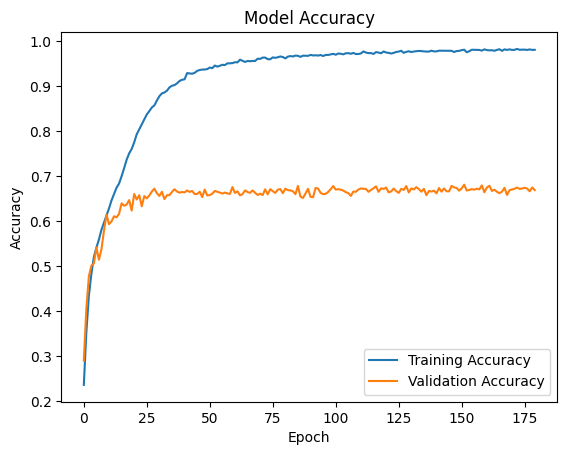

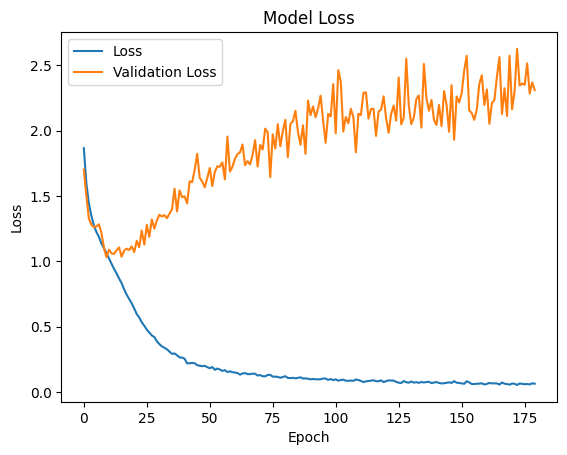

113/113 [==============================] - 2s 13ms/step
Top-1 Accuracy: 65.76%
Top-2 Accuracy: 79.91%
Top-3 Accuracy: 88.94%


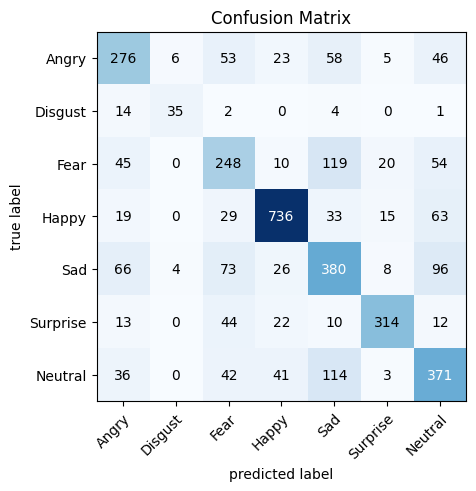

In [ ]:
evaluate(cnn_model, xtest, ytest, history)

<a id="chapter4"></a>
# Step 4 - Proposed Updates:
- 1. Hyperparameters Tuning
- 2. Data Imbalance handling

## 4.1 - Hyperparameters Tuning
- Regularization
- Filter size -- Stride length -- Padding
- Activation
- Losses



In [ ]:
def VGGNet_Modified(input_shape=(48, 48, 1), num_classes=7):
    cnn_model = Sequential()

    # 1st convolution layer
    cnn_model.add(Conv2D(64, input_shape=input_shape, kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization(trainable=False))
    cnn_model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization(trainable=False))
    cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    cnn_model.add(Dropout(0.3))

    # 2nd convolution layer
    cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization(trainable=False))
    cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization(trainable=False))
    cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    cnn_model.add(Dropout(0.3))

    # 3rd convolution layer
    cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    cnn_model.add(Dropout(0.3))

    # 4th convolution layer
    cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    cnn_model.add(Dropout(0.3))

    # Fully connected layer
    cnn_model.add(Flatten())
    cnn_model.add(Dense(512, activation='relu'))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(256, activation='relu'))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(0.3))

    cnn_model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    adam = Adam(learning_rate=0.0001)
    cnn_model.compile(optimizer=adam,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    return cnn_model

# Create the modified VGGNet model
vggnet = VGGNet_Modified()

# Summary the model
#vggnet.summary()

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True,mode='max')
history = vggnet.fit(xtrain, ytrain,
                        batch_size=64,
                        epochs=180,
                        validation_data=(xval, yval),
                     callbacks=[early_stopping])
# baseline epochs - 350

In [ ]:
evaluate(vggnet, xtest, ytest, history)

## 4.2. - Data Imbalance Handling

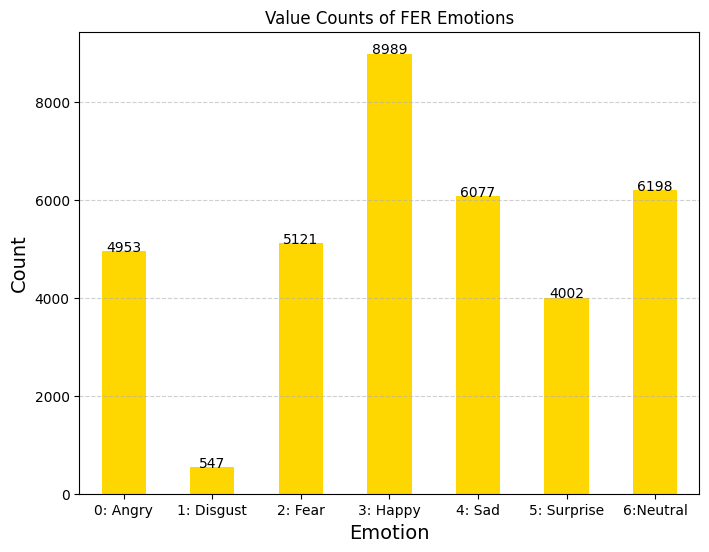

In [ ]:
counts = FER.emotion.value_counts().sort_index()
emotion_labels = {0: '0: Angry', 1: '1: Disgust', 2: '2: Fear', 3: '3: Happy', 4: '4: Sad', 5: '5: Surprise', 6: '6:Neutral'}

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold')
plt.title('Value Counts of FER Emotions')
plt.xlabel('Emotion', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')

plt.show()

### Random Oversampling (ROS)

In [ ]:
# ROS
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

X = FER.pixels.values.reshape(-1, 1)
Y = FER.emotion.values.reshape(-1, 1)

X_res, Y_res = ros.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_res))
resampled_df = pd.DataFrame(data=X_res, columns=['pixels'])
resampled_df['emotion'] = Y_res

Resampled dataset shape Counter({0: 8989, 2: 8989, 4: 8989, 6: 8989, 3: 8989, 5: 8989, 1: 8989})


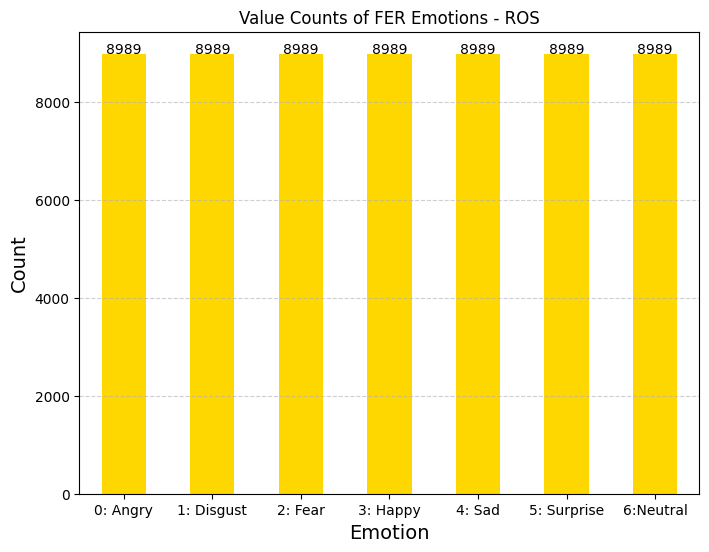

In [ ]:
counts = resampled_df.emotion.value_counts().sort_index()
emotion_labels = {0: '0: Angry', 1: '1: Disgust', 2: '2: Fear', 3: '3: Happy', 4: '4: Sad', 5: '5: Surprise', 6: '6:Neutral'}

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold')
plt.title('Value Counts of FER Emotions - ROS')
plt.xlabel('Emotion', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')

plt.show()

In [ ]:
#print(resampled_df.head())
#resampled_df.to_csv('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/rosfer.csv',index=False)

#### ROS Modelling

In [ ]:
rosfer = pd.read_csv("/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/rosfer.csv")
#rosfer = pd.read_csv("/content/drive/MyDrive/AML Project/Data/rosfer.csv")
rosfer.head(2)

,pixels,emotion
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,151 150 147 155 148 133 111 140 170 174 182 15...,0


In [ ]:
X=rosfer['pixels']
y=rosfer['emotion']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your input data and y is your target labels
# Split the data into training and remaining data
xtrain, xrem, ytrain, yrem = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into validation and test data
xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5, random_state=42)

# Print the shapes of each set
print("Training set:", xtrain.shape, ytrain.shape)
print("Validation set:", xval.shape, yval.shape)
print("Test set:", xtest.shape, ytest.shape)

Training set: (50338,) (50338,)
Validation set: (6292,) (6292,)
Test set: (6293,) (6293,)


In [ ]:
traindf = pd.DataFrame({'pixels': xtrain, 'emotion': ytrain})
valdf = pd.DataFrame({'pixels': xval, 'emotion': yval})
testdf = pd.DataFrame({'pixels': xtest, 'emotion': ytest})

# Print the shapes of each DataFrame
print("Training DataFrame shape:", traindf.shape)
print("Validation DataFrame shape:", valdf.shape)
print("Test DataFrame shape:", testdf.shape)

Training DataFrame shape: (50338, 2)
Validation DataFrame shape: (6292, 2)
Test DataFrame shape: (6293, 2)


In [ ]:
train = traindf['pixels']
ytrain=pd.DataFrame(traindf['emotion'])

test = testdf['pixels']
ytest=pd.DataFrame(testdf['emotion'])

val = valdf['pixels']
yval=pd.DataFrame(valdf['emotion'])

In [ ]:
xtrain = train.apply(split_and_reshape)
xtrain = np.stack(xtrain.to_numpy())
xtrain = xtrain.reshape(len(xtrain), 48, 48, 1)
ytrain = np.array(ytrain).reshape(-1,)  # Reshape to a 1D array

# Testing
xtest = test.apply(split_and_reshape)
xtest = np.stack(xtest.to_numpy())
xtest = xtest.reshape(len(xtest), 48, 48, 1)
ytest = np.array(ytest).reshape(-1,)  # Reshape to a 1D array

# Validation
xval = val.apply(split_and_reshape)
xval = np.stack(xval.to_numpy())
xval = xval.reshape(len(xval), 48, 48, 1)
yval = np.array(yval).reshape(-1,)  # Reshape to a 1D array

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True)
history = vggnet.fit(xtrain, ytrain,
                        batch_size=64,
                        epochs=180,
                        validation_data=(xval, yval),
                     callbacks=[early_stopping])

Epoch 1/180
787/787 [==============================] - 44s 48ms/step - loss: 2.0579 - accuracy: 0.1556 - val_loss: 1.9555 - val_accuracy: 0.1375
Epoch 2/180
787/787 [==============================] - 35s 45ms/step - loss: 1.9476 - accuracy: 0.1604 - val_loss: 1.9419 - val_accuracy: 0.1810
Epoch 3/180
787/787 [==============================] - 35s 44ms/step - loss: 1.9418 - accuracy: 0.1655 - val_loss: 1.9421 - val_accuracy: 0.1740
Epoch 4/180
787/787 [==============================] - 35s 44ms/step - loss: 1.9348 - accuracy: 0.1751 - val_loss: 1.9791 - val_accuracy: 0.1321
Epoch 5/180
787/787 [==============================] - 35s 44ms/step - loss: 1.8893 - accuracy: 0.2019 - val_loss: 1.8016 - val_accuracy: 0.2409
Epoch 6/180
787/787 [==============================] - 35s 44ms/step - loss: 1.7711 - accuracy: 0.2626 - val_loss: 1.6965 - val_accuracy: 0.3231
Epoch 7/180
787/787 [==============================] - 35s 44ms/step - loss: 1.6848 - accuracy: 0.3274 - val_loss: 1.5302 - val_ac

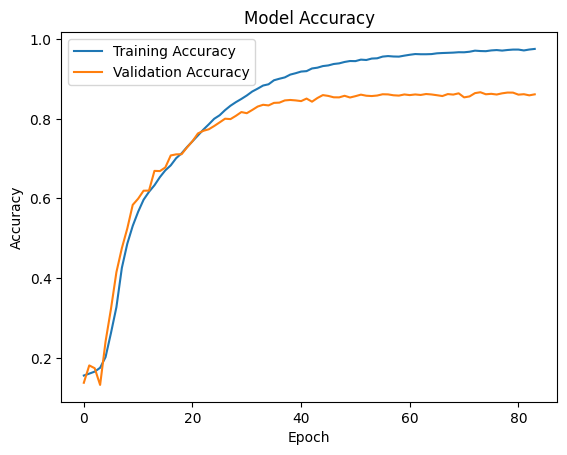

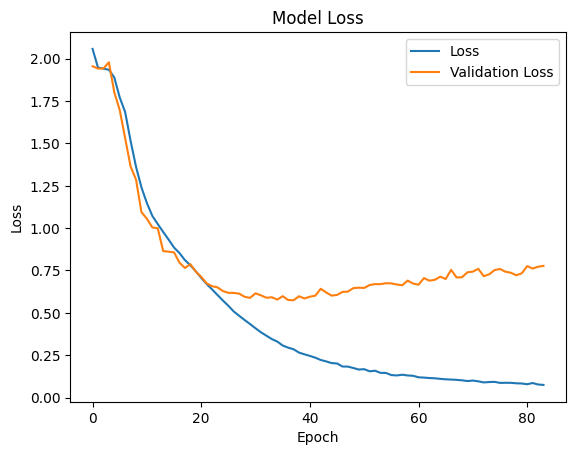

197/197 [==============================] - 3s 10ms/step


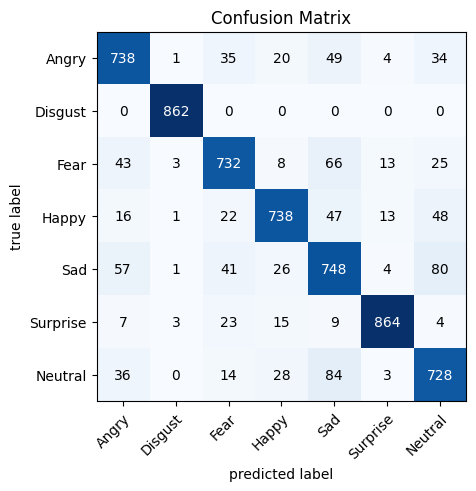

Top-1 Accuracy: 85.97%
Top-2 Accuracy: 92.71%
Top-3 Accuracy: 96.49%


In [ ]:
evaluate(vggnet, xtest, ytest, history)

In [ ]:
model_weights_path = "/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/ros.h5"
vggnet.save(model_weights_path)

### Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X = pd.DataFrame([pd.Series(x.split()) for x in FER['pixels']])
X = X.astype(int)
Y = FER['emotion']


X_res, Y_res = sm.fit_resample(X, Y)
X_res_concat = X_res.apply(lambda x: ' '.join(map(str, x)), axis=1)
print('Resampled dataset shape %s' % Counter(Y_res))
resampled_df = pd.DataFrame(data=X_res_concat, columns=['pixels'])
resampled_df['emotion'] = Y_res

Resampled dataset shape Counter({0: 8989, 2: 8989, 4: 8989, 6: 8989, 3: 8989, 5: 8989, 1: 8989})


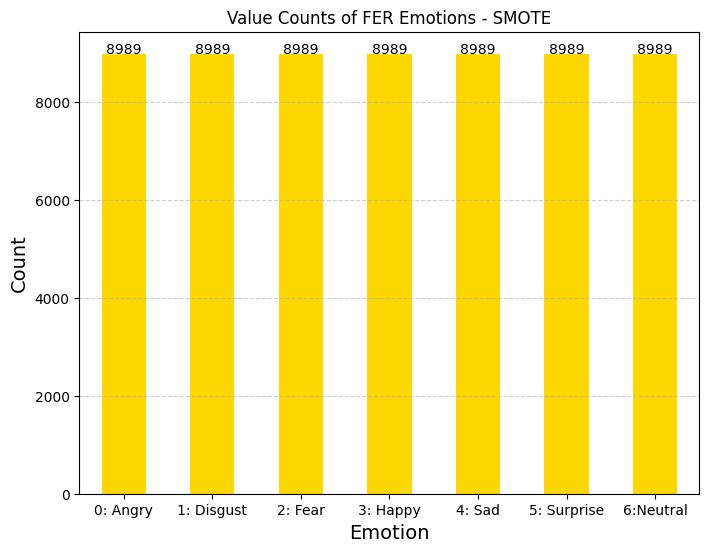

In [ ]:
counts = resampled_df.emotion.value_counts().sort_index()
emotion_labels = {0: '0: Angry', 1: '1: Disgust', 2: '2: Fear', 3: '3: Happy', 4: '4: Sad', 5: '5: Surprise', 6: '6:Neutral'}

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold')
plt.title('Value Counts of FER Emotions - SMOTE')
plt.xlabel('Emotion', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')

plt.show()

In [ ]:
#print(resampled_df.head())
#resampled_df.to_csv('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/smotefer.csv',index = False)

6
6
6
6


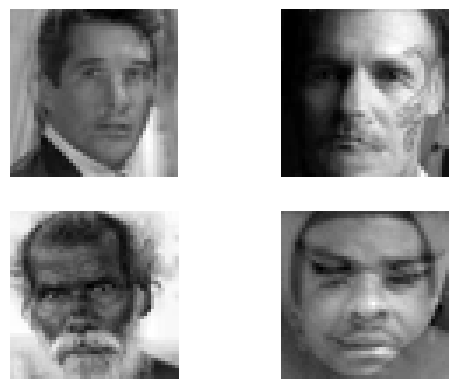

In [ ]:
# Resampled images
# Splitting pixels
def string_to_array(s):
    return np.array(list(map(int, s.split())))

# Plot sample images
for i, j in zip(range(62919, 62923), range(4)):
    plt.subplot(2, 2, j + 1)
    image = string_to_array(resampled_df.pixels[i]).reshape(48, 48)
    print(resampled_df.emotion[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
plt.show()

#### Modelling

In [ ]:
smotefer = pd.read_csv("/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/smotefer.csv")
#smotefer = pd.read_csv("/content/drive/MyDrive/AML Project/Data/smotefer.csv")
smotefer.head(2)

,pixels,emotion
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,151 150 147 155 148 133 111 140 170 174 182 15...,0


In [ ]:
X=smotefer['pixels']
y=smotefer['emotion']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your input data and y is your target labels
# Split the data into training and remaining data
xtrain, xrem, ytrain, yrem = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into validation and test data
xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5, random_state=42)

# Print the shapes of each set
print("Training set:", xtrain.shape, ytrain.shape)
print("Validation set:", xval.shape, yval.shape)
print("Test set:", xtest.shape, ytest.shape)

Training set: (50338,) (50338,)
Validation set: (6292,) (6292,)
Test set: (6293,) (6293,)


In [ ]:
traindf = pd.DataFrame({'pixels': xtrain, 'emotion': ytrain})
valdf = pd.DataFrame({'pixels': xval, 'emotion': yval})
testdf = pd.DataFrame({'pixels': xtest, 'emotion': ytest})

# Print the shapes of each DataFrame
print("Training DataFrame shape:", traindf.shape)
print("Validation DataFrame shape:", valdf.shape)
print("Test DataFrame shape:", testdf.shape)

Training DataFrame shape: (50338, 2)
Validation DataFrame shape: (6292, 2)
Test DataFrame shape: (6293, 2)


In [ ]:
train = traindf['pixels']
ytrain=pd.DataFrame(traindf['emotion'])

test = testdf['pixels']
ytest=pd.DataFrame(testdf['emotion'])

val = valdf['pixels']
yval=pd.DataFrame(valdf['emotion'])

In [ ]:
xtrain = train.apply(split_and_reshape)
xtrain = np.stack(xtrain.to_numpy())
xtrain = xtrain.reshape(len(xtrain), 48, 48, 1)
ytrain = np.array(ytrain).reshape(-1,)  # Reshape to a 1D array

# Testing
xtest = test.apply(split_and_reshape)
xtest = np.stack(xtest.to_numpy())
xtest = xtest.reshape(len(xtest), 48, 48, 1)
ytest = np.array(ytest).reshape(-1,)  # Reshape to a 1D array

# Validation
xval = val.apply(split_and_reshape)
xval = np.stack(xval.to_numpy())
xval = xval.reshape(len(xval), 48, 48, 1)
yval = np.array(yval).reshape(-1,)  # Reshape to a 1D array

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True)
history = vggnet.fit(xtrain, ytrain,
                        batch_size=64,
                        epochs=180,
                        validation_data=(xval, yval),
                     callbacks=[early_stopping])

Epoch 1/180
787/787 [==============================] - 35s 45ms/step - loss: 0.2758 - accuracy: 0.9167 - val_loss: 0.5909 - val_accuracy: 0.8458
Epoch 2/180
787/787 [==============================] - 34s 44ms/step - loss: 0.2030 - accuracy: 0.9345 - val_loss: 0.6098 - val_accuracy: 0.8525
Epoch 3/180
787/787 [==============================] - 35s 44ms/step - loss: 0.1792 - accuracy: 0.9411 - val_loss: 0.5838 - val_accuracy: 0.8614
Epoch 4/180
787/787 [==============================] - 35s 44ms/step - loss: 0.1641 - accuracy: 0.9455 - val_loss: 0.5763 - val_accuracy: 0.8667
Epoch 5/180
787/787 [==============================] - 35s 44ms/step - loss: 0.1488 - accuracy: 0.9508 - val_loss: 0.5683 - val_accuracy: 0.8682
Epoch 6/180
787/787 [==============================] - 34s 44ms/step - loss: 0.1395 - accuracy: 0.9546 - val_loss: 0.5914 - val_accuracy: 0.8678
Epoch 7/180
787/787 [==============================] - 34s 44ms/step - loss: 0.1337 - accuracy: 0.9565 - val_loss: 0.5906 - val_ac

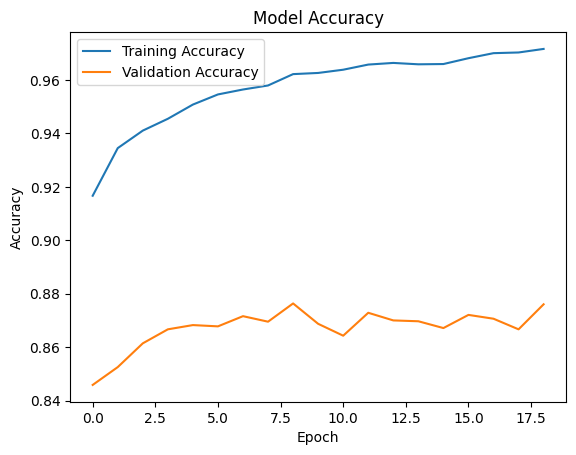

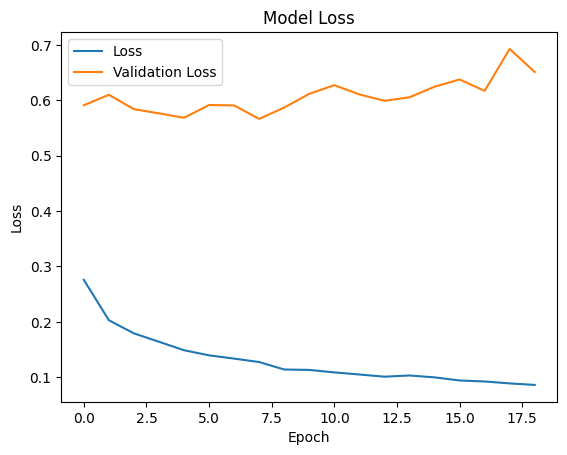

197/197 [==============================] - 1s 7ms/step


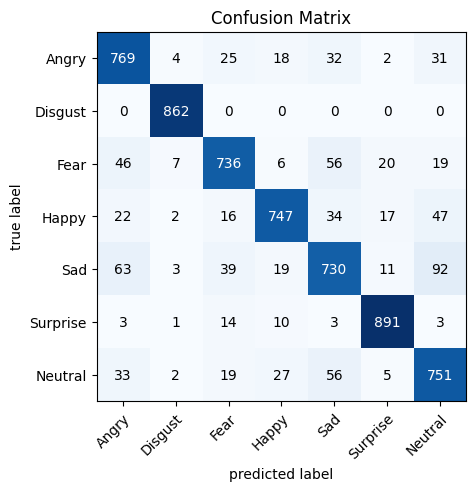

Top-1 Accuracy: 87.18%
Top-2 Accuracy: 93.88%
Top-3 Accuracy: 96.84%


In [ ]:
evaluate(vggnet, xtest, ytest, history)

In [ ]:
model_weights_path = "/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smote.h5"
 # Specify the path where you want to save the weights
vggnet.save(model_weights_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### SmoteTomek

In [ ]:
# SmoteTomek
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)

X = pd.DataFrame([pd.Series(x.split()) for x in FER['pixels']])
X = X.astype(int)
Y = FER['emotion']

X_res, Y_res = smt.fit_resample(X, Y)
X_res_concat = X_res.apply(lambda x: ' '.join(map(str, x)), axis=1)
print('Resampled dataset shape %s' % Counter(Y_res))
resampled_df = pd.DataFrame(data=X_res_concat, columns=['pixels'])
resampled_df['emotion'] = Y_res

Resampled dataset shape Counter({1: 8989, 5: 8977, 3: 8959, 0: 8955, 6: 8943, 4: 8928, 2: 8924})


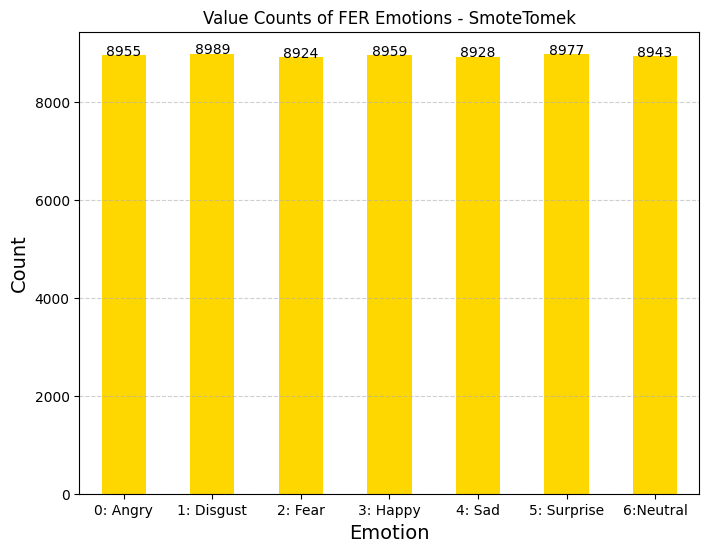

In [ ]:
counts = resampled_df.emotion.value_counts().sort_index()
emotion_labels = {0: '0: Angry', 1: '1: Disgust', 2: '2: Fear', 3: '3: Happy', 4: '4: Sad', 5: '5: Surprise', 6: '6:Neutral'}

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold')
plt.title('Value Counts of FER Emotions - SmoteTomek')
plt.xlabel('Emotion', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')

plt.show()

In [ ]:
#print(resampled_df.head())
#resampled_df.to_csv('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/smoteenfer.csv',index = False)

In [ ]:
resampled_df.shape

(62675, 2)

In [ ]:
#checking to ensure the last images are the resampled ones
FER[FER.pixels == resampled_df.pixels.iloc[-4]]

,emotion,pixels,Usage


6
6
6
6


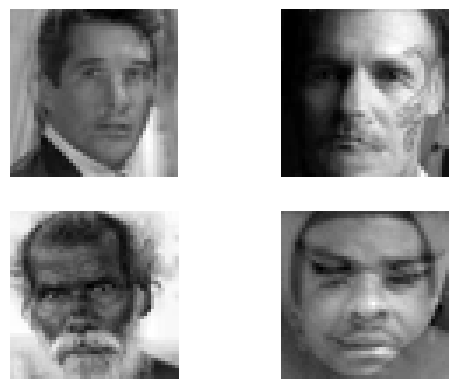

In [ ]:
# Resampled images
# Splitting pixels
def string_to_array(s):
    return np.array(list(map(int, s.split())))

# Plot sample images
for i, j in zip(range(62671, 62675), range(4)):
    plt.subplot(2, 2, j + 1)
    image = string_to_array(resampled_df.pixels[i]).reshape(48, 48)
    print(resampled_df.emotion[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
plt.show()

#### Modelling

In [ ]:
smotetomekfer = pd.read_csv("/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/smotetomekfer.csv")
#smotetomekfer = pd.read_csv("/content/drive/MyDrive/AML Project/Data/smotetomekfer.csv")
smotetomekfer.head(2)

,pixels,emotion
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,151 150 147 155 148 133 111 140 170 174 182 15...,0


In [ ]:
X=smotetomekfer['pixels']
y=smotetomekfer['emotion']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your input data and y is your target labels
# Split the data into training and remaining data
xtrain, xrem, ytrain, yrem = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into validation and test data
xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5, random_state=42)

# Print the shapes of each set
print("Training set:", xtrain.shape, ytrain.shape)
print("Validation set:", xval.shape, yval.shape)
print("Test set:", xtest.shape, ytest.shape)

Training set: (50140,) (50140,)
Validation set: (6267,) (6267,)
Test set: (6268,) (6268,)


In [ ]:
traindf = pd.DataFrame({'pixels': xtrain, 'emotion': ytrain})
valdf = pd.DataFrame({'pixels': xval, 'emotion': yval})
testdf = pd.DataFrame({'pixels': xtest, 'emotion': ytest})

# Print the shapes of each DataFrame
print("Training DataFrame shape:", traindf.shape)
print("Validation DataFrame shape:", valdf.shape)
print("Test DataFrame shape:", testdf.shape)

Training DataFrame shape: (50140, 2)
Validation DataFrame shape: (6267, 2)
Test DataFrame shape: (6268, 2)


In [ ]:
train = traindf['pixels']
ytrain=pd.DataFrame(traindf['emotion'])

test = testdf['pixels']
ytest=pd.DataFrame(testdf['emotion'])

val = valdf['pixels']
yval=pd.DataFrame(valdf['emotion'])

In [ ]:
xtrain = train.apply(split_and_reshape)
xtrain = np.stack(xtrain.to_numpy())
xtrain = xtrain.reshape(len(xtrain), 48, 48, 1)
ytrain = np.array(ytrain).reshape(-1,)  # Reshape to a 1D array

# Testing
xtest = test.apply(split_and_reshape)
xtest = np.stack(xtest.to_numpy())
xtest = xtest.reshape(len(xtest), 48, 48, 1)
ytest = np.array(ytest).reshape(-1,)  # Reshape to a 1D array

# Validation
xval = val.apply(split_and_reshape)
xval = np.stack(xval.to_numpy())
xval = xval.reshape(len(xval), 48, 48, 1)
yval = np.array(yval).reshape(-1,)  # Reshape to a 1D array

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=True)
history = vggnet.fit(xtrain, ytrain,
                        batch_size=64,
                        epochs=180,
                        validation_data=(xval, yval),
                     callbacks=[early_stopping])

Epoch 1/180
784/784 [==============================] - 49s 49ms/step - loss: 2.0688 - accuracy: 0.1513 - val_loss: 2.0188 - val_accuracy: 0.1479
Epoch 2/180
784/784 [==============================] - 36s 46ms/step - loss: 1.9510 - accuracy: 0.1586 - val_loss: 1.9984 - val_accuracy: 0.1404
Epoch 3/180
784/784 [==============================] - 35s 45ms/step - loss: 1.9422 - accuracy: 0.1661 - val_loss: 1.9788 - val_accuracy: 0.1399
Epoch 4/180
784/784 [==============================] - 36s 46ms/step - loss: 1.9391 - accuracy: 0.1695 - val_loss: 1.9547 - val_accuracy: 0.1254
Epoch 5/180
784/784 [==============================] - 36s 46ms/step - loss: 1.9341 - accuracy: 0.1735 - val_loss: 1.9932 - val_accuracy: 0.1607
Epoch 6/180
784/784 [==============================] - 35s 45ms/step - loss: 1.8558 - accuracy: 0.2308 - val_loss: 1.7321 - val_accuracy: 0.2995
Epoch 7/180
784/784 [==============================] - 35s 45ms/step - loss: 1.6601 - accuracy: 0.3474 - val_loss: 1.4659 - val_ac

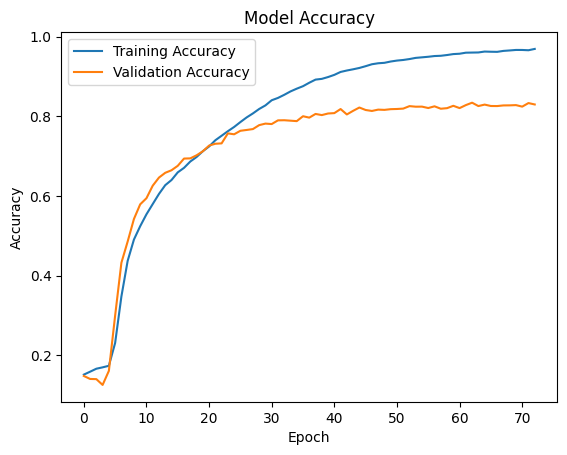

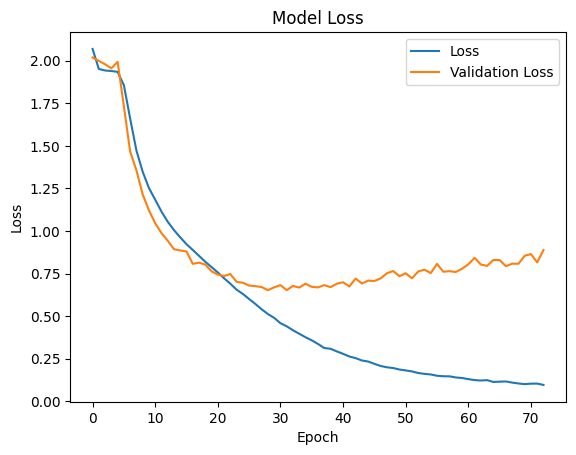

196/196 [==============================] - 2s 7ms/step


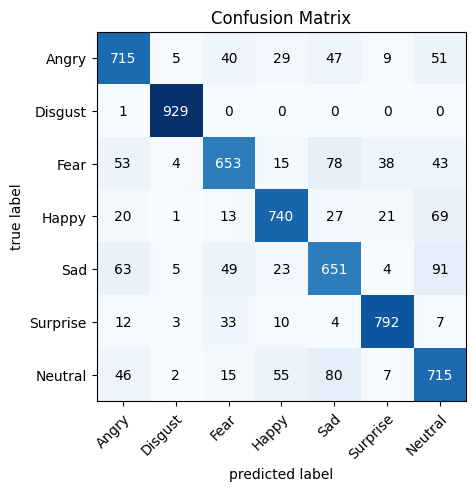

Top-1 Accuracy: 82.88%
Top-2 Accuracy: 91.82%
Top-3 Accuracy: 95.64%


In [ ]:
evaluate(vggnet, xtest, ytest, history)

In [ ]:
model_weights_path = "/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smt.h5"
 # Specify the path where you want to save the weights
vggnet.save(model_weights_path)

### Smoteen

In [ ]:
# Smoteen
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)

X = pd.DataFrame([pd.Series(x.split()) for x in FER['pixels']])
X = X.astype(int)
Y = FER['emotion']

X_res, Y_res = sme.fit_resample(X, Y)
X_res_concat = X_res.apply(lambda x: ' '.join(map(str, x)), axis=1)
print('Resampled dataset shape %s' % Counter(Y_res))

resampled_df = pd.DataFrame(data=X_res_concat, columns=['pixels'])
resampled_df['emotion'] = Y_res

Resampled dataset shape Counter({1: 8953, 5: 7216, 0: 4848, 2: 4817, 6: 3593, 4: 3227, 3: 155})


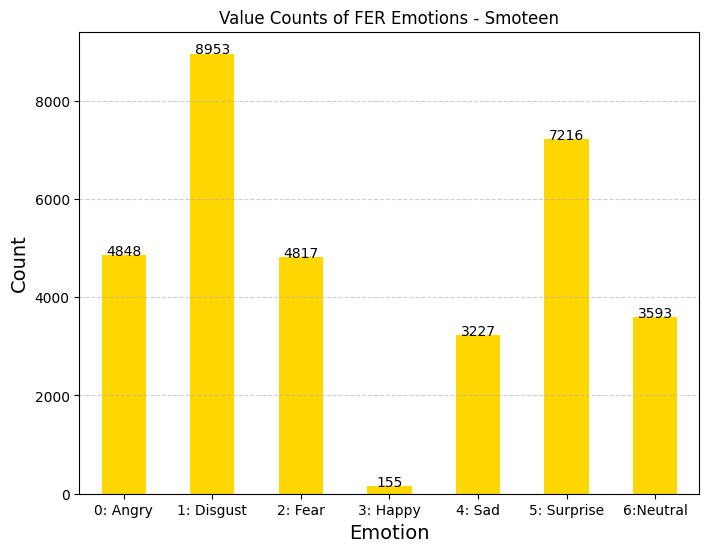

In [ ]:
counts = resampled_df.emotion.value_counts().sort_index()
emotion_labels = {0: '0: Angry', 1: '1: Disgust', 2: '2: Fear', 3: '3: Happy', 4: '4: Sad', 5: '5: Surprise', 6: '6:Neutral'}

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold')
plt.title('Value Counts of FER Emotions - Smoteen')
plt.xlabel('Emotion', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center')

plt.show()

In [ ]:
#print(resampled_df.head())
#resampled_df.to_csv('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/smotetomekfer.csv',index = False)

In [ ]:
resampled_df.shape

(32809, 2)

In [ ]:
#checking to ensure the last images are the resampled ones
FER[FER.pixels == resampled_df.pixels.iloc[-1]]

,emotion,pixels,Usage


6
6
6
6


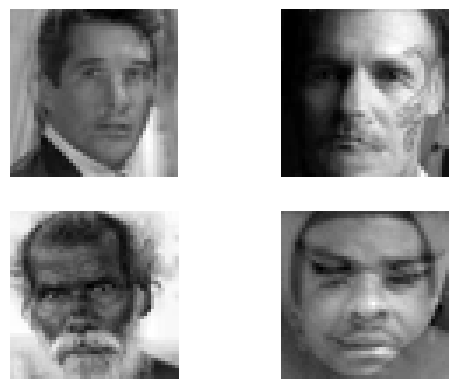

In [ ]:
# Resampled images
# Splitting pixels
def string_to_array(s):
    return np.array(list(map(int, s.split())))

# Plot sample images
for i, j in zip(range(32805, 32809), range(4)):
    plt.subplot(2, 2, j + 1)
    image = string_to_array(resampled_df.pixels[i]).reshape(48, 48)
    print(resampled_df.emotion[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
plt.show()

Due to the reversed effect of the technique, no modelling has been done.

## 4.3 Data Augmentation
https://www.analyticsvidhya.com/blog/2022/04/master-image-augmentation-with-widely-used-python-libraries/#:~:text=Imgaug%20is%20an%20open%2Dsource,%2C%20heatmaps%2C%20and%20segmentation%20maps.


In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
#import ipyplot
!pip install ipyplot

### Image Flipping

In [ ]:
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
hflip_image= hflip.augment_image(xtrain[0])

hflip= iaa.Fliplr(p=0.8)
hflip_image2= hflip.augment_image(xtrain[0])

#Vertical Flip
vflip= iaa.Flipud(p=1.0)
vflip_image= vflip.augment_image(xtrain[0])

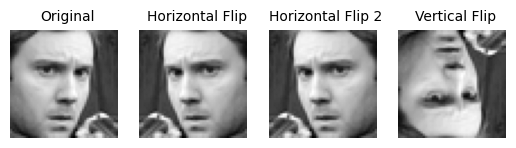

In [ ]:
# Plot sample images
plt.subplot(1, 4, 1)
plt.imshow(xtrain[0], cmap='gray')
plt.text(25, -5, 'Original', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 4, 2)
plt.imshow(hflip_image,  cmap='gray')
plt.text(25, -5, 'Horizontal Flip', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 4, 3)
plt.imshow(hflip_image2, cmap='gray')
plt.text(25, -5, 'Horizontal Flip 2', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 4, 4)
plt.imshow(vflip_image, cmap='gray')
plt.text(25, -5, 'Vertical Flip', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.show()

### Image Rotation

In [ ]:
rotation = iaa.Affine(rotate=(-100,30))
rot_image = rotation.augment_image(xtrain[0].astype(np.uint8))

rotation = iaa.Affine(rotate=(100,-100))
rot_image2 = rotation.augment_image(xtrain[0].astype(np.uint8))

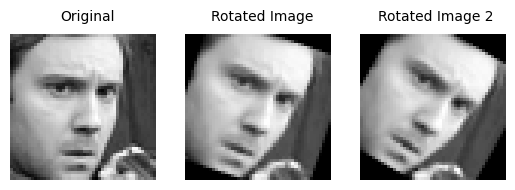

In [ ]:
# Plot sample images
plt.subplot(1, 3, 1)
plt.imshow(xtrain[0], cmap='gray')
plt.text(25, -5, 'Original', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 3, 2)
plt.imshow(rot_image,  cmap='gray')
plt.text(25, -5, 'Rotated Image', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 3, 3)
plt.imshow(rot_image2,  cmap='gray')
plt.text(25, -5, 'Rotated Image 2 ', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.show()

### Image Cropping

In [ ]:
crop = iaa.Crop(percent=(0.1, 0.2))
crop_image = crop.augment_image(xtrain[0].astype(np.uint8))

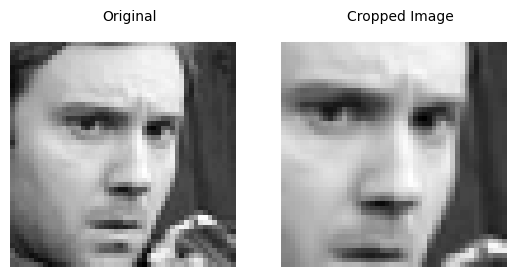

In [ ]:
# Plot sample images
plt.subplot(1, 2, 1)
plt.imshow(xtrain[0], cmap='gray')
plt.text(25, -5, 'Original', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 2, 2)
plt.imshow(crop_image,  cmap='gray')
plt.text(25, -5, 'Cropped Image', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.show()

### Noise Addition

In [ ]:
noise=iaa.AdditiveGaussianNoise(5,8)
noise_image=noise.augment_image(xtrain[0].astype(np.uint8))

noise=iaa.AdditiveGaussianNoise(-11,11)
noise_image2=noise.augment_image(xtrain[0].astype(np.uint8))

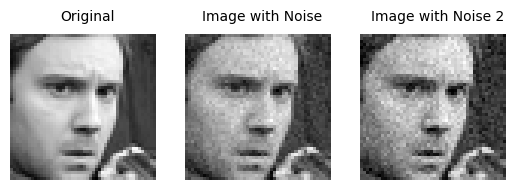

In [ ]:
# Plot sample images
plt.subplot(1, 3, 1)
plt.imshow(xtrain[0], cmap='gray')
plt.text(25, -5, 'Original', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 3, 2)
plt.imshow(noise_image,  cmap='gray')
plt.text(25, -5, 'Image with Noise', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.subplot(1, 3, 3)
plt.imshow(noise_image2,  cmap='gray')
plt.text(25, -5, 'Image with Noise 2', fontsize=10, ha='center')
plt.axis('off')  # Turn off axis

plt.show()

### Custom Data Augmentation Function

In [ ]:
import random
def change(input_img):
  '''
  Randomly changes the photo by horizontal flipping, rotation and noise addition
  '''
  hflip = np.random.choice([True, False])
  rotate = np.random.choice([True, False])
  noise = np.random.choice([True, False])

  if (hflip):
    # horizontally flips a random proportion of the image from 50% to 100%
    hflip= iaa.Fliplr(p= round(np.random.uniform(0.5, 1),2))
    input_img = hflip.augment_image(input_img)

  if (rotate):
    # rotates the image by a random angle between -100 and 100 degrees
    rotation = iaa.Affine(rotate=(random.randint(-100, 100),random.randint(-100, 100)))
    input_img = rotation.augment_image(input_img.astype(np.uint8))

  if (noise):
    # adds Gaussian noise with random mean and standard deviation
    noise=iaa.AdditiveGaussianNoise(random.randint(1, 10),random.randint(1, 10))
    input_img=noise.augment_image(input_img.astype(np.uint8))

  return input_img

In [ ]:
FER[FER.Usage == 'Training'].emotion.value_counts().sort_values(ascending=True)

emotion
1     436
5    3171
0    3995
2    4097
4    4830
6    4965
3    7215
Name: count, dtype: int64

Minimum class count = 436 (Happy)  
Hence, a balanced random sample from the original data will be selected for augmentation and retraining.

In [ ]:
# Class 0
sample = np.random.choice(np.where(ytrain == 0)[0], size=436, replace=False)
# Class 1
indices = np.random.choice(np.where(ytrain == 1)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])
# Class 2
indices = np.random.choice(np.where(ytrain == 2)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])
# Class 3
indices = np.random.choice(np.where(ytrain == 3)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])
# Class 4
indices = np.random.choice(np.where(ytrain == 4)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])
# Class 5
indices = np.random.choice(np.where(ytrain == 5)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])
# Class 6
indices = np.random.choice(np.where(ytrain == 6)[0], size=436, replace=False)
sample = np.concatenate([sample, indices])

In [ ]:
# Applying data augmentation
aug_ytrain = ytrain[sample]
aug_xtrain= []

for img in xtrain[sample]:
  aug_xtrain.append(change(img))

aug_xtrain = np.array(aug_xtrain)
print ("Augmented Data: ", aug_xtrain.shape)

Augmented Data:  (3052, 48, 48, 1)


In [ ]:
# Data Frame Creation
df_aug_ytrain = pd.DataFrame(aug_ytrain)
df_aug_ytrain.columns = ['emotion']

df_aug_xtrain = pd.DataFrame(aug_xtrain.reshape(aug_xtrain.shape[0], -1))
df_aug=  pd.concat([reshaped_aug_xtrain, df_aug_ytrain], axis=1)

In [ ]:
df_aug.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,192,153,129,144,182,150,108,139,179,...,76,79,61,70,68,94,59,71,17,0
2,0,8,13,0,5,2,9,0,8,2,...,19,0,10,0,0,0,8,0,0,0
3,0,9,4,0,4,0,0,7,21,15,...,0,13,0,17,5,18,0,22,6,0
4,3,7,11,1,0,0,0,0,0,4,...,0,0,0,0,7,0,4,0,0,0


In [ ]:
df_aug.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/Augmentedfer.csv',index = False)

### Modelling

#### ROS

Epoch 1/180
48/48 [==============================] - 9s 86ms/step - loss: 1.7897 - accuracy: 0.3853 - val_loss: 1.5065 - val_accuracy: 0.4628
Epoch 2/180
48/48 [==============================] - 3s 63ms/step - loss: 1.3967 - accuracy: 0.4905 - val_loss: 1.0798 - val_accuracy: 0.5974
Epoch 3/180
48/48 [==============================] - 3s 61ms/step - loss: 1.2282 - accuracy: 0.5465 - val_loss: 1.3028 - val_accuracy: 0.5286
Epoch 4/180
48/48 [==============================] - 3s 61ms/step - loss: 1.1292 - accuracy: 0.5901 - val_loss: 1.3263 - val_accuracy: 0.5143
Epoch 5/180
48/48 [==============================] - 4s 75ms/step - loss: 1.0570 - accuracy: 0.6406 - val_loss: 1.5580 - val_accuracy: 0.4753
Epoch 6/180
48/48 [==============================] - 3s 63ms/step - loss: 1.0224 - accuracy: 0.6452 - val_loss: 1.5422 - val_accuracy: 0.4408
Epoch 7/180
48/48 [==============================] - 3s 61ms/step - loss: 0.9027 - accuracy: 0.6904 - val_loss: 1.4396 - val_accuracy: 0.5302
Epoch 

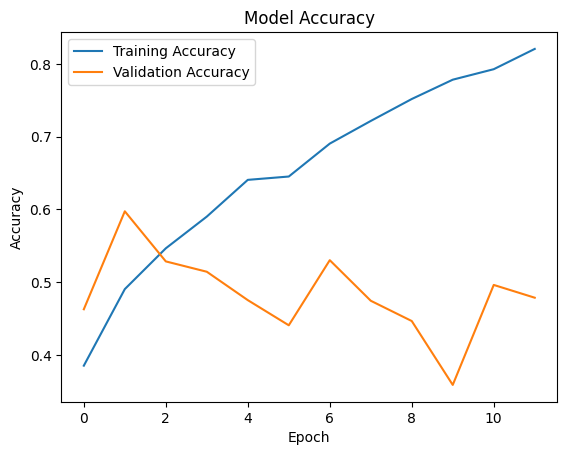

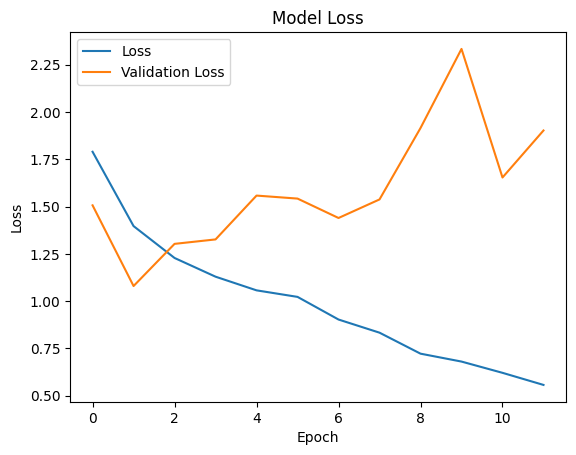

113/113 [==============================] - 1s 6ms/step


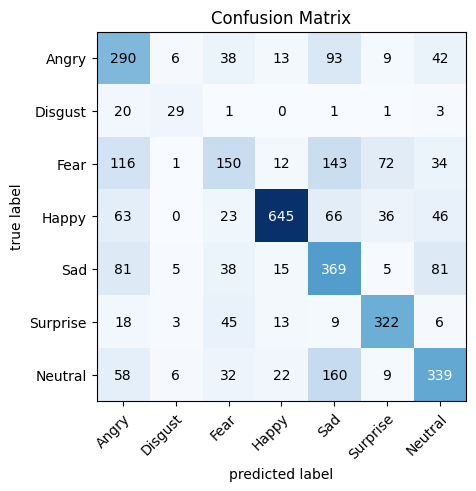

Top-1 Accuracy: 59.74%
Top-2 Accuracy: 79.91%
Top-3 Accuracy: 88.63%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/rosfer.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X, y,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/augros.h5')

#### SMOTE

Epoch 1/180
48/48 [==============================] - 9s 72ms/step - loss: 1.6929 - accuracy: 0.4371 - val_loss: 1.2519 - val_accuracy: 0.5770
Epoch 2/180
48/48 [==============================] - 3s 62ms/step - loss: 1.3139 - accuracy: 0.5256 - val_loss: 1.3786 - val_accuracy: 0.5152
Epoch 3/180
48/48 [==============================] - 3s 63ms/step - loss: 1.1479 - accuracy: 0.5888 - val_loss: 1.1854 - val_accuracy: 0.5756
Epoch 4/180
48/48 [==============================] - 3s 61ms/step - loss: 0.9916 - accuracy: 0.6560 - val_loss: 1.1529 - val_accuracy: 0.6088
Epoch 5/180
48/48 [==============================] - 3s 61ms/step - loss: 0.9308 - accuracy: 0.6868 - val_loss: 1.6058 - val_accuracy: 0.4620
Epoch 6/180
48/48 [==============================] - 3s 61ms/step - loss: 0.8559 - accuracy: 0.7090 - val_loss: 2.2916 - val_accuracy: 0.3619
Epoch 7/180
48/48 [==============================] - 4s 78ms/step - loss: 0.7756 - accuracy: 0.7490 - val_loss: 1.3949 - val_accuracy: 0.5258
Epoch 

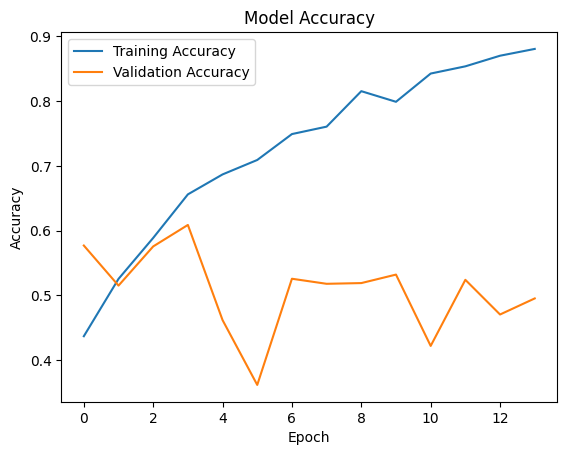

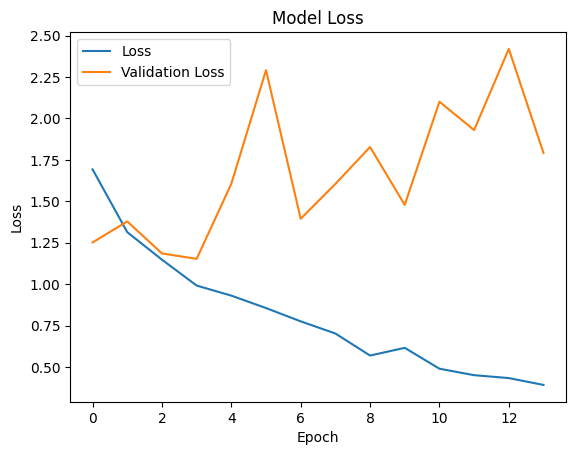

113/113 [==============================] - 1s 8ms/step


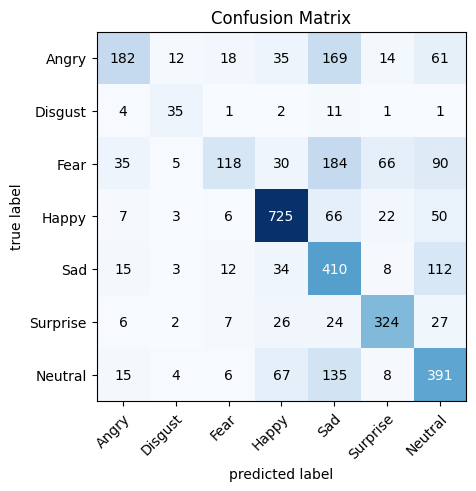

Top-1 Accuracy: 60.88%
Top-2 Accuracy: 78.99%
Top-3 Accuracy: 89.22%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smote.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X, y,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/augsmote.h5')

#### SmoteTomek

Epoch 1/180
48/48 [==============================] - 10s 72ms/step - loss: 1.7811 - accuracy: 0.3952 - val_loss: 1.3134 - val_accuracy: 0.5104
Epoch 2/180
48/48 [==============================] - 3s 62ms/step - loss: 1.3714 - accuracy: 0.4977 - val_loss: 1.1732 - val_accuracy: 0.5681
Epoch 3/180
48/48 [==============================] - 4s 75ms/step - loss: 1.1973 - accuracy: 0.5872 - val_loss: 1.3289 - val_accuracy: 0.5143
Epoch 4/180
48/48 [==============================] - 3s 63ms/step - loss: 1.0580 - accuracy: 0.6412 - val_loss: 1.2144 - val_accuracy: 0.5829
Epoch 5/180
48/48 [==============================] - 3s 61ms/step - loss: 0.9530 - accuracy: 0.6789 - val_loss: 1.4164 - val_accuracy: 0.5143
Epoch 6/180
48/48 [==============================] - 3s 61ms/step - loss: 0.8593 - accuracy: 0.7199 - val_loss: 1.6303 - val_accuracy: 0.4681
Epoch 7/180
48/48 [==============================] - 3s 62ms/step - loss: 0.8013 - accuracy: 0.7454 - val_loss: 1.4107 - val_accuracy: 0.5444
Epoch

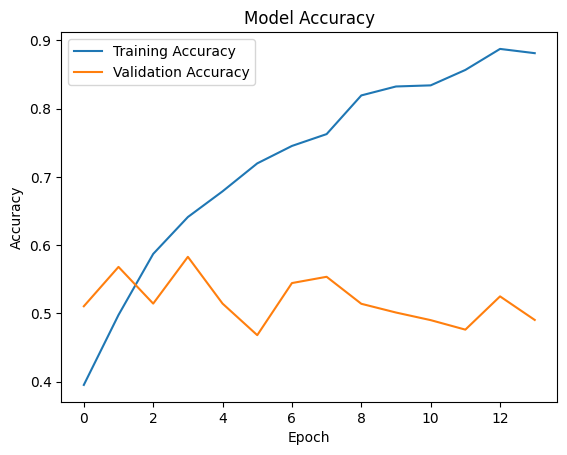

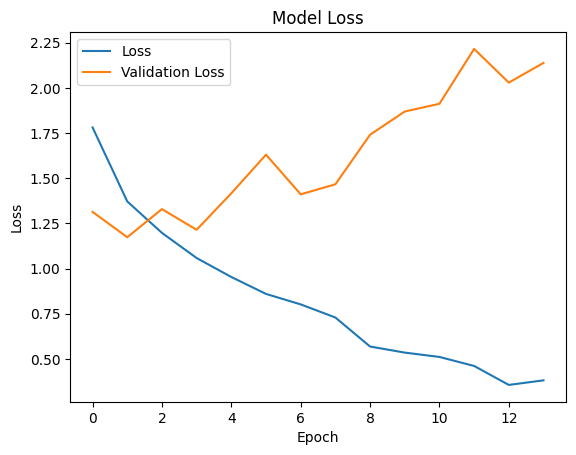

113/113 [==============================] - 2s 15ms/step


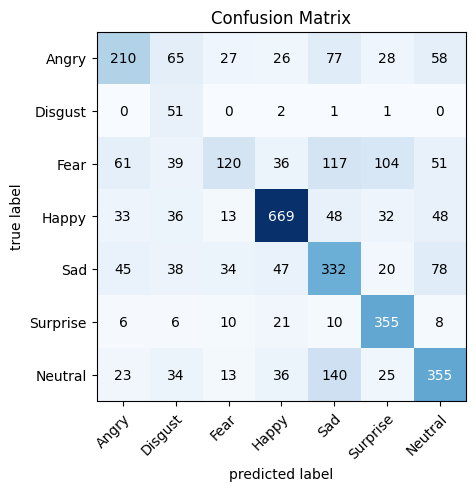

Top-1 Accuracy: 58.29%
Top-2 Accuracy: 77.46%
Top-3 Accuracy: 86.77%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smotetomek.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X, y,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/augsmotetomek.h5')

## 4.4 Auxilary Datasets

### AffectNet Dataset
https://www.kaggle.com/datasets/noamsegal/affectnet-training-data?select=happy

#### 1. Data Reading

In [ ]:
import os
import cv2

In [ ]:
# 0. Anger
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/anger"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

anger = np.array(all_images_pixels)
print ("Anger: ", anger.shape)

Anger:  (3218, 48, 48)


In [ ]:
# 1. Disgust
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/disgust"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

disgust = np.array(all_images_pixels)
print ("Disgust: ", disgust.shape)

Disgust:  (2477, 48, 48)


In [ ]:
# 2. Fear
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/fear"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

fear = np.array(all_images_pixels)
print ("Fear: ", fear.shape)

Fear:  (3181, 48, 48)


In [ ]:
# 3. Happy
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/happy"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

happy = np.array(all_images_pixels)
print ("Happy: ", happy.shape)

Happy:  (5080, 48, 48)


In [ ]:
# 4. Sad
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/sad"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

sad = np.array(all_images_pixels)
print ("Sad: ", sad.shape)

Sad:  (3131, 48, 48)


In [ ]:
# 5. Surprise
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/surprise"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

surprise = np.array(all_images_pixels)
print ("Surprise: ", surprise.shape)

Surprise:  (4110, 48, 48)


In [ ]:
# 6. Neutral
folder_path = "/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet/neutral"
all_images_pixels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

    if file_name.endswith('.png'):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 48x48 pixels
        resized_image = cv2.resize(gray_image, (48, 48))
        all_images_pixels.append(resized_image)

neutral = np.array(all_images_pixels)
print ("Neutral: ", neutral.shape)

Neutral:  (5136, 48, 48)


#### Dataframe creation

In [ ]:
# Emotions
y0 =np.empty(anger.shape[0]); y0.fill(0)
y1 = np.empty(disgust.shape[0]); y1.fill(1)
y2 = np.empty(fear.shape[0]); y2.fill(2)
y3 = np.empty(happy.shape[0]); y3.fill(3)
y4 = np.empty(sad.shape[0]); y4.fill(4)
y5 = np.empty(surprise.shape[0]); y5.fill(5)
y6 = np.empty(neutral.shape[0]); y6.fill(6)

y = pd.DataFrame(np.hstack((y0, y1, y2, y3, y4, y5, y6)))
y.columns = ['emotion']

In [ ]:
# Pixels
reshaped_anger = pd.DataFrame(anger.reshape(anger.shape[0], -1))
reshaped_disgust = pd.DataFrame(disgust.reshape(disgust.shape[0], -1))
reshaped_fear = pd.DataFrame(fear.reshape(fear.shape[0], -1))
reshaped_happy = pd.DataFrame(happy.reshape(happy.shape[0], -1))
reshaped_sad = pd.DataFrame(sad.reshape(sad.shape[0], -1))
reshaped_surprise = pd.DataFrame(surprise.reshape(surprise.shape[0], -1))
reshaped_neutral = pd.DataFrame(neutral.reshape(neutral.shape[0], -1))

x = pd.concat([reshaped_anger, reshaped_disgust, reshaped_fear, reshaped_happy, reshaped_sad, reshaped_surprise, reshaped_neutral ],
              axis=0)
x.reset_index(drop=True, inplace=True)

In [ ]:
# Combined df
AffectNet = pd.concat([x, y], axis=1)
AffectNet.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,75,73,76,75,76,76,76,75,76,96,...,42,52,49,42,39,41,34,21,26,0.0
1,181,186,185,187,186,162,82,45,71,75,...,52,65,46,70,71,119,118,160,178,0.0
2,1,1,0,0,0,0,0,0,1,2,...,253,128,255,129,247,112,139,140,138,0.0
3,170,183,191,202,197,197,197,192,198,186,...,178,108,1,1,0,0,1,0,1,0.0
4,183,174,164,150,101,92,97,8,17,20,...,100,133,177,105,86,214,108,134,221,0.0


In [ ]:
AffectNet.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Advanced Machine Learning/AML Project/Data/AffectNet.csv',index = False)

In [ ]:
AffectNet.shape

(26333, 2305)

### ExpW Dataset
https://www.kaggle.com/datasets/mohammedaaltaha/expwf

### Modelling

#### ROS

Epoch 1/180
412/412 [==============================] - 28s 52ms/step - loss: 1.1865 - accuracy: 0.5369 - val_loss: 2.7274 - val_accuracy: 0.2399
Epoch 2/180
412/412 [==============================] - 22s 53ms/step - loss: 0.9924 - accuracy: 0.6151 - val_loss: 2.4930 - val_accuracy: 0.2522
Epoch 3/180
412/412 [==============================] - 22s 52ms/step - loss: 0.9434 - accuracy: 0.6427 - val_loss: 2.8032 - val_accuracy: 0.2703
Epoch 4/180
412/412 [==============================] - 21s 52ms/step - loss: 0.8937 - accuracy: 0.6633 - val_loss: 2.9528 - val_accuracy: 0.2382
Epoch 5/180
412/412 [==============================] - 22s 53ms/step - loss: 0.8649 - accuracy: 0.6754 - val_loss: 2.8965 - val_accuracy: 0.2848
Epoch 6/180
412/412 [==============================] - 22s 52ms/step - loss: 0.8245 - accuracy: 0.6928 - val_loss: 2.9893 - val_accuracy: 0.2505
Epoch 7/180
412/412 [==============================] - 22s 52ms/step - loss: 0.8092 - accuracy: 0.6943 - val_loss: 2.8733 - val_ac

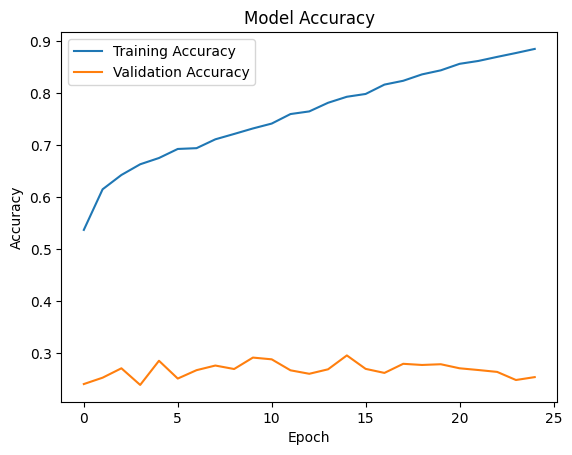

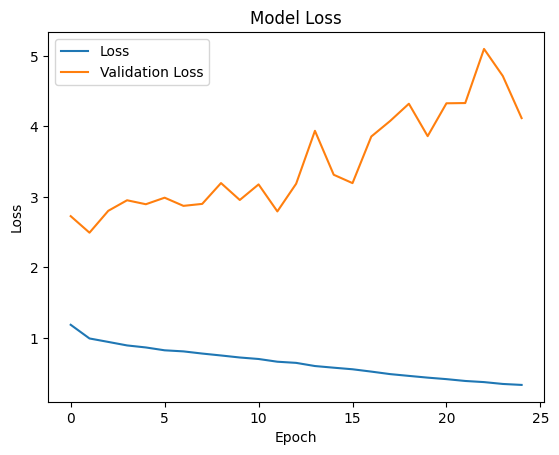

113/113 [==============================] - 1s 7ms/step


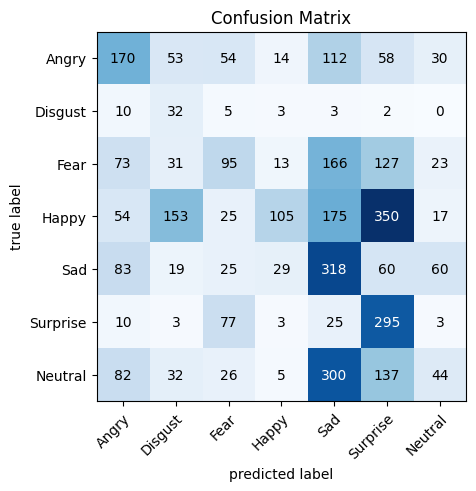

Top-1 Accuracy: 29.51%
Top-2 Accuracy: 45.33%
Top-3 Accuracy: 53.41%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/rosfer.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_aux, y_aux,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/affros.h5')

#### SMOTE

Epoch 1/180
412/412 [==============================] - 26s 52ms/step - loss: 1.1692 - accuracy: 0.5557 - val_loss: 3.1106 - val_accuracy: 0.2296
Epoch 2/180
412/412 [==============================] - 21s 51ms/step - loss: 0.9721 - accuracy: 0.6229 - val_loss: 2.7616 - val_accuracy: 0.3031
Epoch 3/180
412/412 [==============================] - 22s 53ms/step - loss: 0.9296 - accuracy: 0.6425 - val_loss: 2.8227 - val_accuracy: 0.2692
Epoch 4/180
412/412 [==============================] - 22s 54ms/step - loss: 0.8876 - accuracy: 0.6630 - val_loss: 2.7230 - val_accuracy: 0.2630
Epoch 5/180
412/412 [==============================] - 21s 52ms/step - loss: 0.8494 - accuracy: 0.6814 - val_loss: 2.9763 - val_accuracy: 0.2502
Epoch 6/180
412/412 [==============================] - 21s 52ms/step - loss: 0.8185 - accuracy: 0.6920 - val_loss: 2.9029 - val_accuracy: 0.2739
Epoch 7/180
412/412 [==============================] - 22s 53ms/step - loss: 0.7890 - accuracy: 0.7042 - val_loss: 2.9118 - val_ac

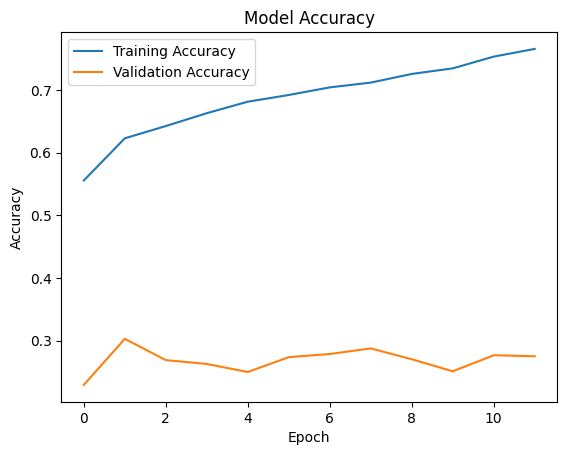

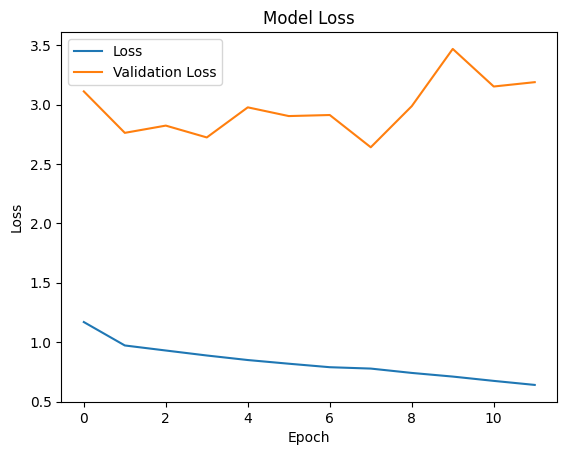

113/113 [==============================] - 1s 7ms/step


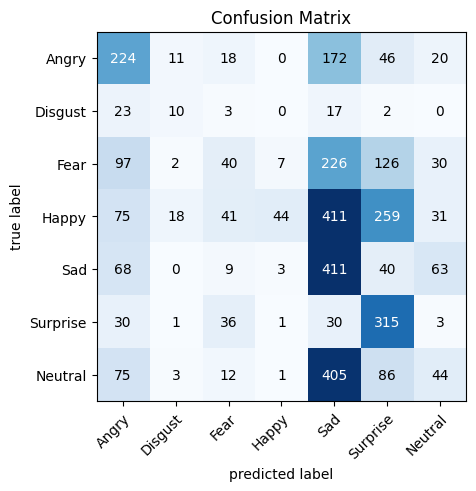

Top-1 Accuracy: 30.31%
Top-2 Accuracy: 44.58%
Top-3 Accuracy: 54.25%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smote.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_aux, y_aux,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/affsmote.h5')

#### SmoteTomek

Epoch 1/180
412/412 [==============================] - 26s 52ms/step - loss: 1.1574 - accuracy: 0.5566 - val_loss: 2.4912 - val_accuracy: 0.2836
Epoch 2/180
412/412 [==============================] - 21s 51ms/step - loss: 0.9712 - accuracy: 0.6309 - val_loss: 2.6722 - val_accuracy: 0.2575
Epoch 3/180
412/412 [==============================] - 21s 51ms/step - loss: 0.9143 - accuracy: 0.6521 - val_loss: 2.7390 - val_accuracy: 0.2917
Epoch 4/180
412/412 [==============================] - 21s 51ms/step - loss: 0.8778 - accuracy: 0.6651 - val_loss: 2.7697 - val_accuracy: 0.2541
Epoch 5/180
412/412 [==============================] - 21s 51ms/step - loss: 0.8510 - accuracy: 0.6791 - val_loss: 3.1537 - val_accuracy: 0.2666
Epoch 6/180
412/412 [==============================] - 21s 52ms/step - loss: 0.8071 - accuracy: 0.6956 - val_loss: 3.1460 - val_accuracy: 0.2781
Epoch 7/180
412/412 [==============================] - 21s 52ms/step - loss: 0.7812 - accuracy: 0.7068 - val_loss: 2.9816 - val_ac

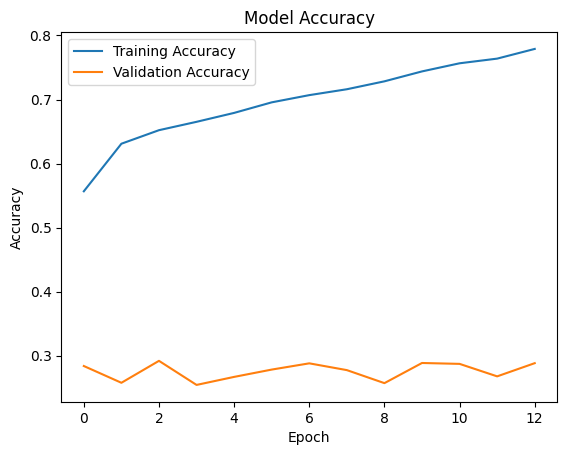

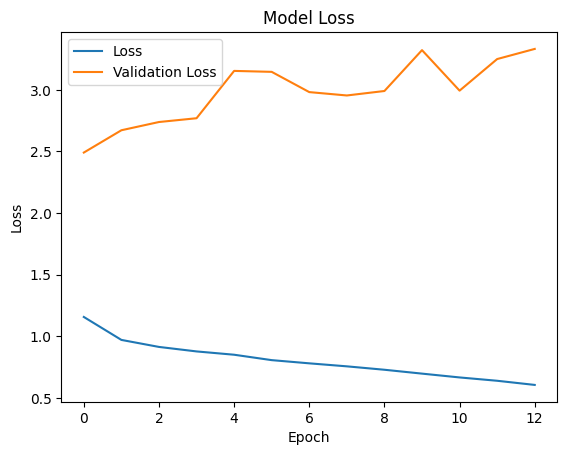

113/113 [==============================] - 1s 7ms/step


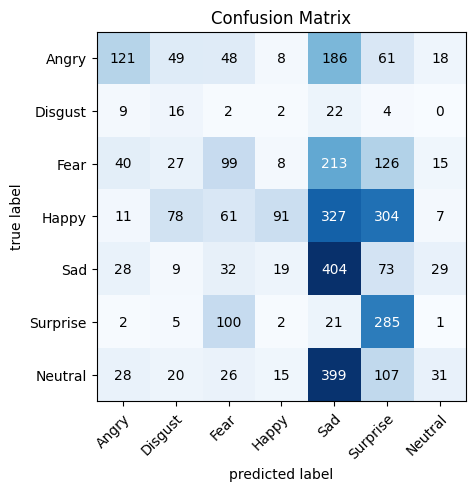

Top-1 Accuracy: 29.17%
Top-2 Accuracy: 42.71%
Top-3 Accuracy: 51.96%


In [ ]:
with open('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/vggnetarch.json', 'r') as f:
    model_json = f.read()
model = tf.keras.models.model_from_json(model_json)

# Step 2: Load the Saved Model Weights
model.load_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smotetomek.h5')

# Step 4: Load and Preprocess the Auxiliary Data (AffectNet)
# Load and preprocess your AffectNet dataset.
# Preprocess your AffectNet data here...

# Step 5: Define Validation Dataset
# Load your validation dataset.

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
# Train the model using the AffectNet data.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_aux, y_aux,
                    batch_size=64,
                    epochs=180,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Step 8: Evaluate the Model
# Evaluate the model on the validation dataset.
evaluate(model, X_val, y_val, history)
model.save_weights('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/affsmotetomek.h5')

## Ensemble

In [ ]:
FER = pd.read_csv("/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/Data/fer2013.csv")
#FER = pd.read_csv("/content/drive/MyDrive/AML Project/Data/fer2013.csv")
FER.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [ ]:
# Splitting the data into training, validation, and testingtrain = FER[FER['Usage']=='Training']['pixels']
train = FER[FER['Usage']=='Training']['pixels']
ytrain=pd.DataFrame([FER[FER['Usage']=='Training']['emotion']])

test = FER[FER['Usage']=='PublicTest']['pixels']
ytest=pd.DataFrame([FER[FER['Usage']=='PublicTest']['emotion']])

val = FER[FER['Usage']=='PrivateTest']['pixels']
yval=pd.DataFrame([FER[FER['Usage']=='PrivateTest']['emotion']])

In [ ]:
# Reshaping inputs
def split_and_reshape(row):
    numbers = list(map(int, row.split()))
    array = np.array(numbers).reshape(48, 48)
    return array

In [ ]:
# Training
xtrain = train.apply(split_and_reshape)
xtrain = np.stack(xtrain .to_numpy())
xtrain = xtrain.reshape(len(xtrain), 48, 48, 1)
ytrain = np.array(ytrain).reshape(ytrain.shape[1],)

# Testing
xtest = test.apply(split_and_reshape)
xtest = np.stack(xtest .to_numpy())
xtest = xtest.reshape(len(xtest), 48, 48, 1)
ytest = np.array(ytest).reshape(ytest.shape[1],)

# Validation
xval = val.apply(split_and_reshape)
xval = np.stack(xval.to_numpy())
xval = xval.reshape(len(xval), 48, 48, 1)
yval = np.array(yval).reshape(yval.shape[1],)

In [ ]:
print("xtrain:", xtrain.shape)
print("ytrain:", ytrain.shape)

print("xtest:", xtest.shape)
print("ytest:", ytest.shape)

print("xval:", xval.shape)
print("yval:", yval.shape)

xtrain: (28709, 48, 48, 1)
ytrain: (28709,)
xtest: (3589, 48, 48, 1)
ytest: (3589,)
xval: (3589, 48, 48, 1)
yval: (3589,)


In [ ]:
    keras_model = tf.keras.models.load_model('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/ros.h5', compile=False)
    keras_model._name = 'model1'
    keras_model2 = tf.keras.models.load_model('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smote.h5', compile=False)
    keras_model2._name = 'model2'
    keras_model3 = tf.keras.models.load_model('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/smt.h5', compile=False)
    keras_model3._name = 'model3'
    models = [keras_model, keras_model2, keras_model3]
    model_input = tf.keras.Input(shape=(48, 48, 1))
    model_outputs = [model(model_input) for model in models]
    ensemble_output = tf.keras.layers.Average()(model_outputs)
    ensemble = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:
ensemble

In [ ]:
y_pred_prob = ensemble_model.predict(xval)

# Get the predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get top-1, top-2, and top-3 accuracies
top_1_accuracy = 0
top_2_accuracy = 0
top_3_accuracy = 0
for i in range(len(yval)):
    sorted_indices = np.argsort(y_pred_prob[i])[::-1]
    if yval[i] == sorted_indices[0]:
        top_1_accuracy += 1
    if yval[i] in sorted_indices[:2]:
        top_2_accuracy += 1
    if yval[i] in sorted_indices[:3]:
        top_3_accuracy += 1

top_1_accuracy /= len(yval)
top_2_accuracy /= len(yval)
top_3_accuracy /= len(yval)

print("Top-1 Accuracy:", top_1_accuracy)
print("Top-2 Accuracy:", top_2_accuracy)
print("Top-3 Accuracy:", top_3_accuracy)

113/113 [==============================] - 131s 1s/step
Top-1 Accuracy: 0.9718584563945388
Top-2 Accuracy: 0.9958205628308721
Top-3 Accuracy: 0.9972137085539148


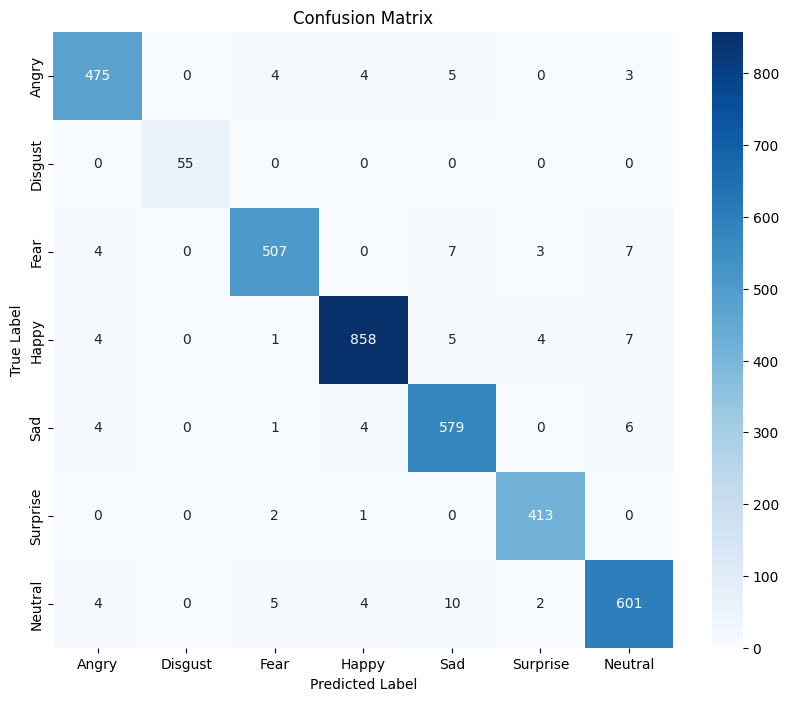

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(yval, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os

# Define the file path
file_path = '/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/ensemble.h5'

# Remove the existing file if it exists
if os.path.exists(file_path):
    os.remove(file_path)

# Save the ensemble model
ensemble.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
ensemble.save('/content/drive/MyDrive/23 24/Spring 24/AML/AML Project/ensemble.keras')